In [10]:
import pandas as pd
import numpy as np

diabetesData = pd.read_csv('diabetes.csv')
diabetesData = diabetesData.sample(frac=1)

train_data = diabetesData.iloc[0:384, 0:8]
test_data = diabetesData.iloc[384:786, 0:8]

train_labels = diabetesData.iloc[0:384, -1]
test_labels = diabetesData.iloc[384:786, -1]

train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

In [13]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [14]:
from keras import models
from keras import layers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model


Using TensorFlow backend.


In [15]:
import numpy as np

k = 4
num_val_sample = len(train_data) // 4
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing Fold #',i)
    
    val_data = train_data[i * num_val_sample: (i+1) * num_val_sample]
    val_labels = train_labels[i * num_val_sample: (i+1) * num_val_sample]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_sample],train_data[(i+1) * num_val_sample:]], axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_sample],train_labels[(i+1) * num_val_sample:]],axis=0)
    
    model = build_model()
    
    model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=1, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_acc)
        
np.mean(all_scores)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


0.7213541716337204

In [18]:
num_epochs = 500
all_accuracy_histories = []

for i in range(k):
    
    val_data = train_data[i * num_val_sample: (i+1) * num_val_sample]
    val_labels = train_labels[i * num_val_sample: (i+1) * num_val_sample]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_sample],train_data[(i+1) * num_val_sample:]], axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_sample],train_labels[(i+1) * num_val_sample:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_labels))
    accuracy_history = history.history['val_accuracy']
    
    all_accuracy_histories.append(accuracy_history)
    
average_accuracy_history = [np.mean([x[i] for x in all_accuracy_histories]) for i in range(num_epochs)]
print('Done!')

Done!


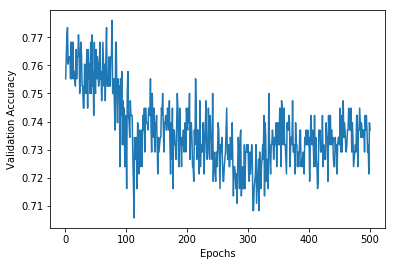

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_accuracy_history)+1), average_accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [25]:
model = build_model()
model.fit(train_data, train_labels, epochs=110, batch_size=16, verbose=0)

model.evaluate(test_data, test_labels)

384/384 [==============================] - 0s 42us/step


[0.8346298957864443, 0.7317708134651184]